<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/%EC%A0%84%EA%B8%B0%EC%B0%A8%EA%B5%AC%EB%B6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

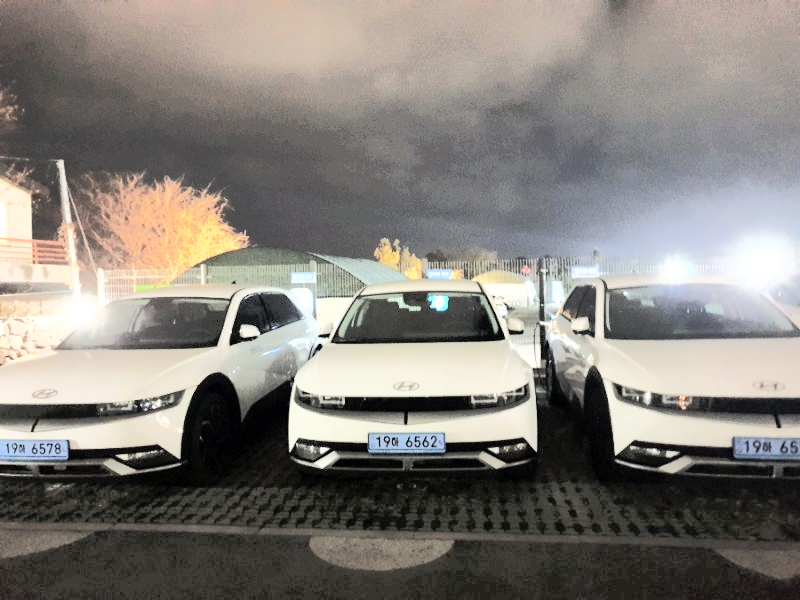

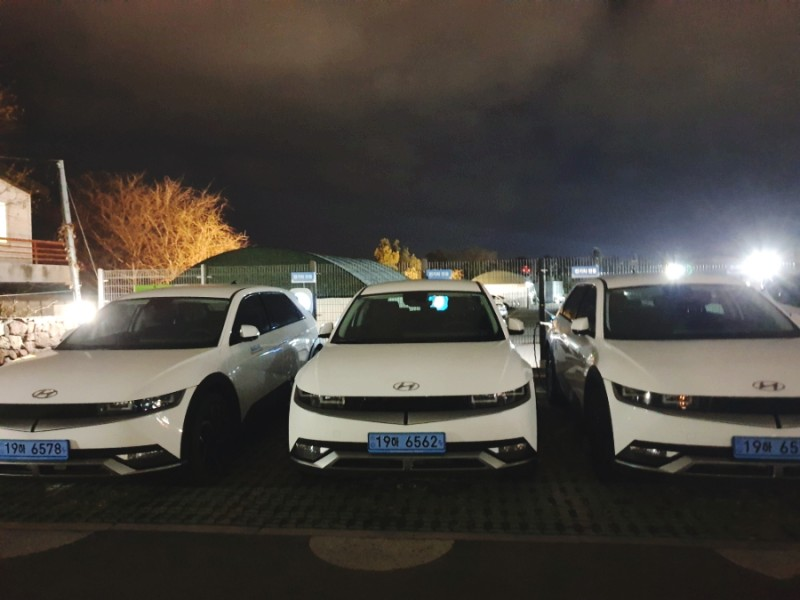

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

src = cv2.imread("저녁예시.jpg")

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
src_y, src_cr, src_cb = cv2.split(src_ycrcb)

# 밝기 성분에 대해서만 히스토그램 평활화 수행
src_y = cv2.equalizeHist(src_y)
dst_ycrcb = cv2.merge((src_y, src_cr, src_cb))
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)


cv2_imshow(dst)
cv2_imshow(src)

In [ ]:
img = dst[432:452,368:446]
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(img)

elec_range = elec_range = cv2.inRange(img,(70, 0, 200),(130, 235, 255))

cv2_imshow(elec_range)

In [ ]:
h,w,c = img.shape
isElectronic = 0 
notElectronic = 0

for y in range(h):
    for x in range(w):
        if elec_range[y, x] >= 1: # 픽셀 값이 1 이상이면 전기차로 가정
            isElectronic += 1
        else:
            notElectronic += 1
                                  
print(isElectronic, notElectronic)
            
if 10 * isElectronic >= notElectronic: # 10배(하이퍼 파라미터) 이상 차이가 나면 전기자동차로 인식
    print("전기 자동차가 검출되었습니다.")

else:
    print("전기 자동차가 아닙니다.")

975 585
전기 자동차가 검출되었습니다.
